# 5-7. 미니 프로젝트 : 가위바위보 분류기를 만들자
직접 사진을 찍어 가위바위보 이미지 데이터 준비

### 라이브러리 버전을 확인
---

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.12.0-rc1
1.23.5


### 데이터를 준비하자
---

🔶 데이터 만들기
(1) 구글의 teachable machine 사이트에서 Get Started 버튼을 눌러보세요. 그 다음, Image Project - Standard image model을 선택하면, Webcam을 구동해 클래스별 이미지 데이터를 직접 촬영해서 만들 수 있는 화면이 나타남
https://teachablemachine.withgoogle.com/

### 데이터 불러오기 + Resize 하기
---
숫자 손글씨의 경우 이미지 크기가 28x28 이었기 때문에, 우리의 가위, 바위, 보 이미지도 28x28로 만들어야 함. PIL 라이브러리 사용

In [2]:
from PIL import Image
import glob
import os

print('PIL 라이브러리 import 완료')

PIL 라이브러리 import 완료


가위 이미지를 불러와 28x28 사이즈로 변경

In [3]:
def resize_images(img_path):
    images = glob.glob(img_path + '/*.jpg')
    
    print(len(images), 'images to be resized.')
    
    # 파일마다 모두 28x28로 바꾸어 저장
    target_size = (28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img,'JPEG')
        
    print(len(images), 'images resized.')
    
#가위 이미지가 저장된 디렉토리 아래의 모든 jpg파일을 읽어들여서 resize하기
image_dir_path='./data/scissor'
resize_images(image_dir_path)

print('가위 이미지 resize완료!')
        

100 images to be resized.
100 images resized.
가위 이미지 resize완료!


C:\Users\SJang\AppData\Local\Temp\ipykernel_2772\3396355731.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size, Image.ANTIALIAS)


In [4]:
# rock
image_dir_path2 ='./data/rock'
resize_images(image_dir_path2)

100 images to be resized.
100 images resized.


C:\Users\SJang\AppData\Local\Temp\ipykernel_2772\3396355731.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size, Image.ANTIALIAS)


In [5]:
# paper
image_dir_path3 ='./data/paper'
resize_images(image_dir_path3)

100 images to be resized.
100 images resized.


C:\Users\SJang\AppData\Local\Temp\ipykernel_2772\3396355731.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size, Image.ANTIALIAS)


(6) 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수 생성

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받음. 가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링.

In [6]:
import numpy as np

# 가위바위보 이미지 개수 총합에 주의
def load_data(img_path, number_of_data=300):
    # 가위:0, 바위:1, 보:2
    img_size=28
    color=3
    # 이미지 데이터와 라벨 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0 # 가위:0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1 # 바위:1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2 # 보:2
        idx=idx+1
        
    print('이미지 개수는', idx,'입니다.')
    return imgs, labels


image_dir_path = './data'
(x_train, y_train) = load_data(image_dir_path)
x_train_norm = x_train/255.0 # 입력은 0~1 사이의 값으로 정규화

print('x_train shape: {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))

이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


이미지 불러와보기

라벨:  0


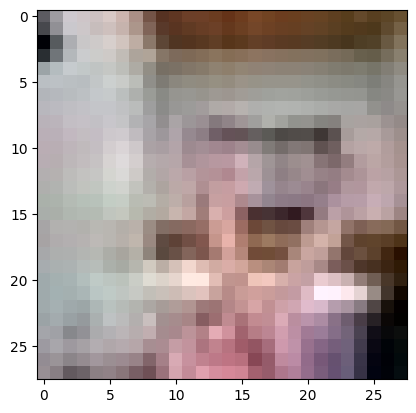

In [7]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 딥러닝 네트워크 설계하기
--- 

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32,(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

### 딥러닝 네트워크 학습시키기
---

In [9]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")

x_train_reshaped=x_train.reshape( -1, 28, 28, 3)  

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")


Before Reshape - x_train_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 1s 6ms/step - loss: 9.2377 - accuracy: 0.3367
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 2.4554 - accuracy: 0.4333
Epoch 3/10
10/10 [==============================] - 0s 6ms/step - loss: 0.6380 - accuracy: 0.7633
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.3838 - accuracy: 0.8567
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.1560 - accuracy: 0.9367
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0778 - accuracy: 0.9900
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0473 - accuracy: 0.9967
Epoch 8/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0414 - accuracy: 0.9967
Epoch 9/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0270 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 6ms/step - loss: 0.0192 - accuracy: 1.0000


### 테스트 데이터로 성능 확인

In [11]:
image_dir_path = './test'
(x_test, y_test) = load_data(image_dir_path, number_of_data=1500)

이미지 개수는 1500 입니다.


In [12]:
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))

x_test shape: (1500, 28, 28, 3)
y_test shape: (1500,)


In [13]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

47/47 - 0s - loss: 4.9887 - accuracy: 0.3847 - 207ms/epoch - 4ms/step
test_loss: 4.988659381866455
test_accuracy: 0.38466668128967285


* validation dataset을 나누지 않고 학습과 평가를 진행해봤을 때, loss 값과 accuracy 값 차이가 심하게 남.
* train시 loss 값: 0.0192, test시 loss 값: 4.99
* train시 accuracy 값 : 1.0, test시 accuracy 값:0.38
* 위 결과를 통해 모델이 train data에 overfitting되어있음을 알 수 있음.
---
### 범용성 향상을 위해 시도해볼 것
1. 학습 데이터 개수 늘리기
2. train, val 데이터 나눠서 overfitting 경향 살피기
3. 딥러닝 네트워크 수정하기

### 1. 학습 데이터 개수 늘리기

__새로운 data 가위: 0, 바위: 1, 보: 2 로 라벨링__

In [15]:
import numpy as np

# 가위바위보 이미지 개수 총합에 주의
def load_data(img_path, number_of_data=2100):
    # 가위:0, 바위:1, 보:2
    img_size=28
    color=3
    # 이미지 데이터와 라벨 데이터를 담을 행렬(matrix) 영역 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels=np.zeros(number_of_data,dtype=np.int32)
    
    idx=0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0 # 가위:0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=1 # 바위:1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:]=img
        labels[idx]=2 # 보:2
        idx=idx+1
        
    print('이미지 개수는', idx,'입니다.')
    return imgs, labels


image_dir_path = './data2'
(x, y) = load_data(image_dir_path, number_of_data=2100)
x_norm = x/255.0 # 입력은 0~1 사이의 값으로 정규화

print('x shape: {}'.format(x.shape))
print('y shape: {}'.format(y.shape))

이미지 개수는 2100 입니다.
x shape: (2100, 28, 28, 3)
y shape: (2100,)


In [27]:
print(np.max(x), np.max(x_norm))

255 1.0


In [23]:
x_norm.shape

(2100, 28, 28, 3)

### 2. train, val dataset 분리하여 과적합 경향 살피기

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_norm, y, test_size=0.2, random_state=2023)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(1680, 28, 28, 3) (420, 28, 28, 3) (1680,) (420,)


라벨:  2


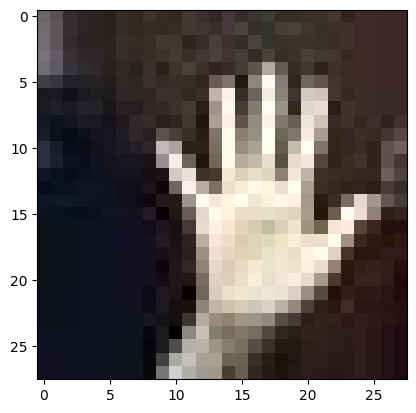

In [29]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

라벨:  1


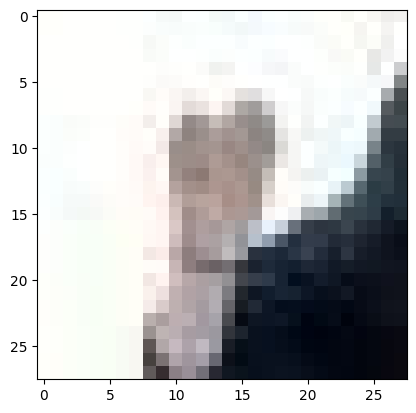

In [30]:
plt.imshow(x_val[0])
print('라벨: ', y_val[0])

__딥러닝 학습__

In [60]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
53/53 [==============================] - 1s 7ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9976
Epoch 2/10
53/53 [==============================] - 0s 6ms/step - loss: 5.0503e-04 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9976
Epoch 3/10
53/53 [==============================] - 0s 6ms/step - loss: 2.9957e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/10
53/53 [==============================] - 0s 5ms/step - loss: 1.1827e-04 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9976
Epoch 5/10
53/53 [==============================] - 0s 6ms/step - loss: 9.2787e-05 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9976
Epoch 6/10
53/53 [==============================] - 0s 5ms/step - loss: 8.2806e-05 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/10
53/53 [==============================] - 0s 6ms/step - loss: 7.7866e-05 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9

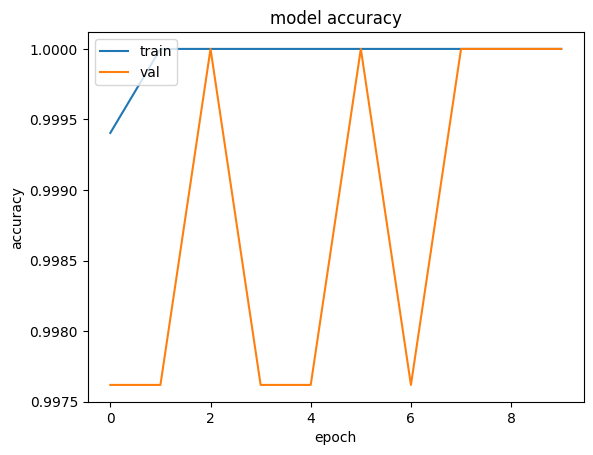

In [61]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

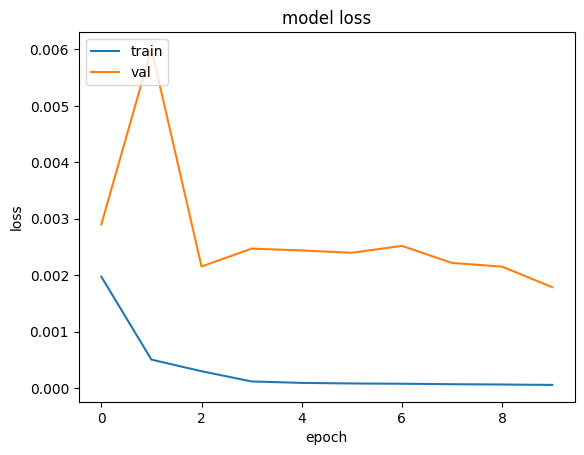

In [62]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

* 여전히 overfitting 발생

__테스트 데이터로 성능 확인__

In [46]:
image_dir_path = './test2'
(x_test, y_test) = load_data(image_dir_path, number_of_data=300)
x_test_norm = x_test/255.0

이미지 개수는 300 입니다.


In [47]:
print('x_test shape: {}'.format(x_test.shape))
print('y_test shape: {}'.format(y_test.shape))
print(np.max(x_test),',', np.max(x_test_norm))

x_test shape: (300, 28, 28, 3)
y_test shape: (300,)
255 , 1.0


In [64]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

10/10 - 0s - loss: 9.2919 - accuracy: 0.3800 - 31ms/epoch - 3ms/step
test_loss: 9.291893005371094
test_accuracy: 0.3799999952316284


### 3. 딥러닝 하이퍼파라미터 변경

__기존 딥러닝 네트워크 구성__
* 1st layer : 3x3 kernel size의 16개 필터로 구성된 Conv2D layer, Relu 활성화함수 사용, padding은 설정 안했으므로 output size는 줄어들 것
* 2nd layer : 2x2 pool size의 MaxPool2D layer. 2x2 patch에서 max 값을 찾아outputsize 축소시킴
* 3rd layer : 3x3 kernel size의 16개 필터로 구성된 Conv2D layer, 나머지는 1st와 동일
* 4th layer : 2nd 와 동일
* 5th layer : 2D output을 1D array로 전환
* 6th layer : 32 neurons로 구성된 Dense layer. Relu 활성화함수 사용
* 7th layer : 10 neurons로 구성된 output layer. softmax 활성화 함수를 사용했으므로, 데이터가 10개의 class로 구분됐을 때 probability를 알려줌.

__(1) 7th layer에서 neurons 수를 3개로 수정해야 함. (가위, 바위, 보 세 가지 class로 구분하는 문제이기 때문)__

In [70]:
# 바꿔볼 수 있는 하이퍼파라미터들
n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 32)               

Epoch 1/10
53/53 [==============================] - 1s 9ms/step - loss: 1.0827 - accuracy: 0.4185 - val_loss: 1.0255 - val_accuracy: 0.4714
Epoch 2/10
53/53 [==============================] - 0s 7ms/step - loss: 0.9199 - accuracy: 0.5970 - val_loss: 1.0773 - val_accuracy: 0.4310
Epoch 3/10
53/53 [==============================] - 0s 6ms/step - loss: 0.7749 - accuracy: 0.6601 - val_loss: 0.6948 - val_accuracy: 0.7190
Epoch 4/10
53/53 [==============================] - 0s 6ms/step - loss: 0.6105 - accuracy: 0.7673 - val_loss: 0.5796 - val_accuracy: 0.7690
Epoch 5/10
53/53 [==============================] - 0s 6ms/step - loss: 0.4837 - accuracy: 0.8357 - val_loss: 0.4251 - val_accuracy: 0.8714
Epoch 6/10
53/53 [==============================] - 0s 6ms/step - loss: 0.3677 - accuracy: 0.8893 - val_loss: 0.3309 - val_accuracy: 0.9143
Epoch 7/10
53/53 [==============================] - 0s 6ms/step - loss: 0.3032 - accuracy: 0.9071 - val_loss: 0.3120 - val_accuracy: 0.8905
Epoch 8/10
53/53 [==

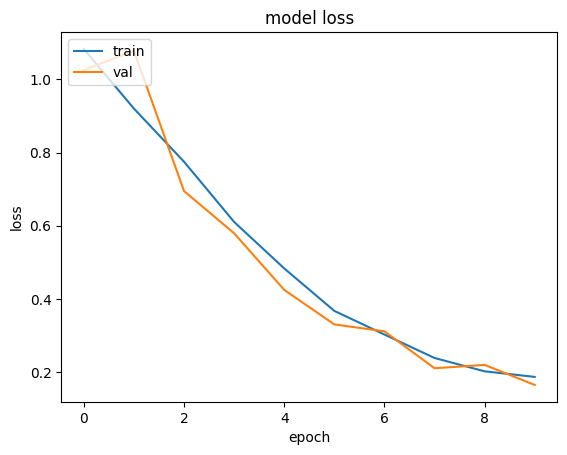

10/10 - 0s - loss: 1.3511 - accuracy: 0.5667 - 33ms/epoch - 3ms/step
test_loss: 1.3511382341384888 
test_accuracy: 0.5666666626930237


In [71]:
# 모델 훈련
history=model.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_val, y_val))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

* 과적합 방지함.
* test 데이터의 loss 값이 많이 떨어지고, accuracy 값이 56%로 향상됨.

__(2) 첫 번째 층(Conv2D) filter size 키워서 이미지 표현력 향상시켜보기 (16->32->64)__

In [74]:
# 바꿔볼 수 있는 하이퍼파라미터들
n_channel_1 = 64
n_channel_2 = 32
n_dense = 32
n_train_epoch = 10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 32)               

Epoch 1/10
53/53 [==============================] - 1s 16ms/step - loss: 1.0634 - accuracy: 0.4310 - val_loss: 0.9593 - val_accuracy: 0.5905
Epoch 2/10
53/53 [==============================] - 1s 13ms/step - loss: 0.8389 - accuracy: 0.6280 - val_loss: 0.7664 - val_accuracy: 0.6167
Epoch 3/10
53/53 [==============================] - 1s 13ms/step - loss: 0.5540 - accuracy: 0.7851 - val_loss: 0.4664 - val_accuracy: 0.8262
Epoch 4/10
53/53 [==============================] - 1s 13ms/step - loss: 0.3763 - accuracy: 0.8821 - val_loss: 0.2925 - val_accuracy: 0.9238
Epoch 5/10
53/53 [==============================] - 1s 13ms/step - loss: 0.2544 - accuracy: 0.9315 - val_loss: 0.2405 - val_accuracy: 0.9238
Epoch 6/10
53/53 [==============================] - 1s 13ms/step - loss: 0.1745 - accuracy: 0.9542 - val_loss: 0.1532 - val_accuracy: 0.9667
Epoch 7/10
53/53 [==============================] - 1s 14ms/step - loss: 0.1280 - accuracy: 0.9690 - val_loss: 0.1317 - val_accuracy: 0.9690
Epoch 8/10
53

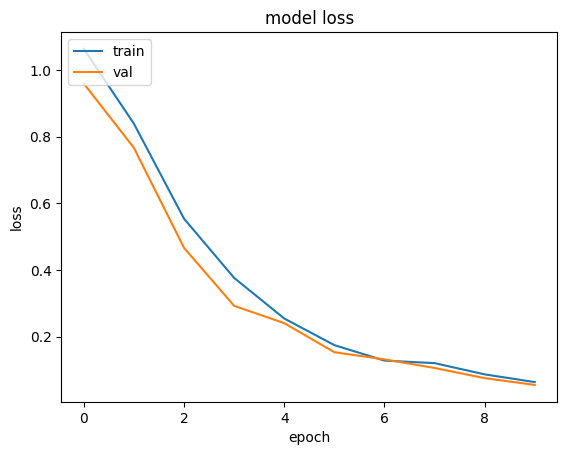

10/10 - 0s - loss: 1.9758 - accuracy: 0.5433 - 42ms/epoch - 4ms/step
test_loss: 1.975776195526123 
test_accuracy: 0.5433333516120911


In [75]:
# 모델 훈련
history=model.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_val, y_val))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

* 32, 64 까지 filter 개수를 늘려봤지만, 오히려 loss가 증가하고 accuracy가 소폭 감소함.
* filter는 얼마나 많은(다양한) 패턴을 학습할 것인지 결정함. 하나의 필터는 필터가 입력 이미지에서 감지한 영역을 하나의 feature map으로 표현함.
* filter를 무작정 늘리면 overfitting을 야기하거나, 학습 속도를 저해하므로 세 번째 layer의 filter 개수만 늘려보고 다른 파라미터를 건드려보자

__(3) 세 번째 층(Conv2D) filter size 키워서 이미지 표현력 향상시켜보기__

In [80]:
# 바꿔볼 수 있는 하이퍼파라미터들
n_channel_1 = 16
n_channel_2 = 64
n_dense = 32
n_train_epoch = 10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 16)        448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        9280      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 32)               

Epoch 1/10
53/53 [==============================] - 1s 9ms/step - loss: 1.0796 - accuracy: 0.4048 - val_loss: 1.0304 - val_accuracy: 0.5071
Epoch 2/10
53/53 [==============================] - 0s 7ms/step - loss: 0.8909 - accuracy: 0.5863 - val_loss: 0.8389 - val_accuracy: 0.6262
Epoch 3/10
53/53 [==============================] - 0s 7ms/step - loss: 0.6148 - accuracy: 0.7786 - val_loss: 0.5110 - val_accuracy: 0.8214
Epoch 4/10
53/53 [==============================] - 0s 6ms/step - loss: 0.4110 - accuracy: 0.8702 - val_loss: 0.3376 - val_accuracy: 0.9095
Epoch 5/10
53/53 [==============================] - 0s 6ms/step - loss: 0.2783 - accuracy: 0.9321 - val_loss: 0.2460 - val_accuracy: 0.9500
Epoch 6/10
53/53 [==============================] - 0s 6ms/step - loss: 0.2242 - accuracy: 0.9405 - val_loss: 0.2470 - val_accuracy: 0.8952
Epoch 7/10
53/53 [==============================] - 0s 7ms/step - loss: 0.1668 - accuracy: 0.9542 - val_loss: 0.1553 - val_accuracy: 0.9571
Epoch 8/10
53/53 [==

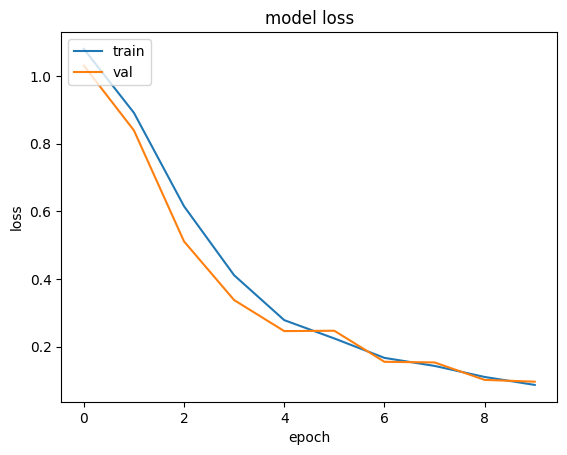

10/10 - 0s - loss: 2.3285 - accuracy: 0.5000 - 33ms/epoch - 3ms/step
test_loss: 2.328458786010742 
test_accuracy: 0.5


In [81]:
# 모델 훈련
history=model.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_val, y_val))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

* n_channel_1, n_channel_2 = (16,64) ,(32,64), (64,64) 로 세 가지 경우를 해봤지만,
* (16,64)개의 filter를 쓴 경우의 loss가 가장 낮고 accuracy가 가장 높았음. 
* 그러나, 여전히 초기 파라미터 값보다 성능이 떨어짐
* filter 개수는 초기값 그대로 두고, 가위바위보 사진 중 가장자리에 가위바위보를 표현한 feature가 있을 수 있으니 padding을 해보자

__(4) Conv2D layer에 padding 추가('padding='same')__

In [88]:
# 기존 하이퍼파라미터 고정
# Conv2D에 padding='same'추가
n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), padding='same', activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Epoch 1/10
53/53 [==============================] - 1s 9ms/step - loss: 1.0945 - accuracy: 0.3964 - val_loss: 1.0376 - val_accuracy: 0.5405
Epoch 2/10
53/53 [==============================] - 0s 8ms/step - loss: 0.9424 - accuracy: 0.5625 - val_loss: 0.8392 - val_accuracy: 0.5786
Epoch 3/10
53/53 [==============================] - 0s 7ms/step - loss: 0.7001 - accuracy: 0.7036 - val_loss: 0.6193 - val_accuracy: 0.7357
Epoch 4/10
53/53 [==============================] - 0s 7ms/step - loss: 0.5161 - accuracy: 0.8149 - val_loss: 0.4458 - val_accuracy: 0.8524
Epoch 5/10
53/53 [==============================] - 0s 7ms/step - loss: 0.3968 - accuracy: 0.8750 - val_loss: 0.3412 - val_accuracy: 0.8833
Epoch 6/10
53/53 [==============================] - 0s 7ms/step - loss: 0.2995 - accuracy: 0.9167 - val_loss: 0.2609 - val_accuracy: 0.9476
Epoch 7/10
53/53 [==============================] - 0s 8ms/step - loss: 0.2240 - accuracy: 0.9381 - val_loss: 0.2108 - val_accuracy: 0.9548
Epoch 8/10
53/53 [==

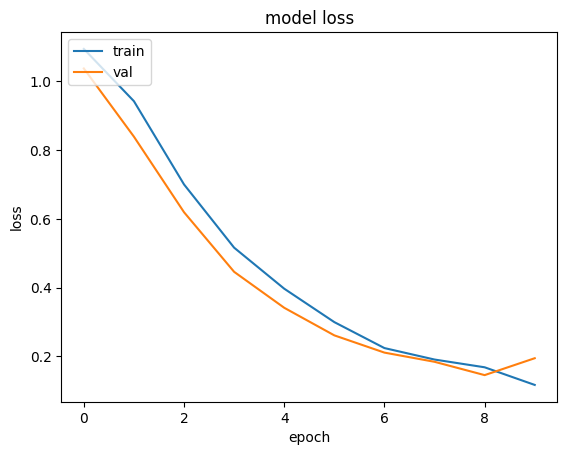

10/10 - 0s - loss: 2.6853 - accuracy: 0.4067 - 37ms/epoch - 4ms/step
test_loss: 2.68532657623291 
test_accuracy: 0.40666666626930237


In [89]:
# 모델 훈련
history=model.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_val, y_val))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

* 마지막 layer의 neurons 수를 3개로 수정한 이후에는 train과 val dataset 사이의 과적합은 효과적으로 해결함.
* 다른 하이퍼파라미터는 수정할수록 모델 성능이 안좋아짐.
* test data에 적용시에는 범용성이 떨어짐.

__어떤 데이터를 잘못 추론하는지 확인__

In [92]:
predicted_result = model.predict(x_test_norm) #모델이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0 # 1번째 x_test를 살펴보자.
print('model이 추론한 가장 가능성이 높은 결과:', predicted_labels[idx])
print('실제 데이터의 라벨:', y_test[idx])

10/10 [==============================] - 0s 2ms/step
model이 추론한 가장 가능성이 높은 결과: 1
실제 데이터의 라벨: 0


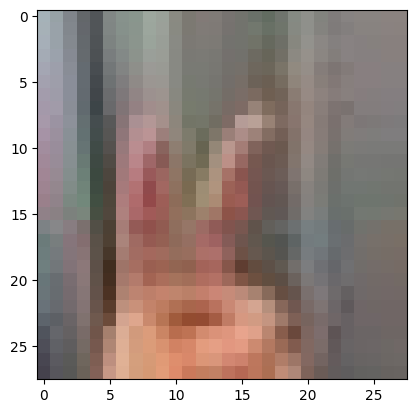

In [93]:
plt.imshow(x_test_norm[idx], cmap=plt.cm.binary)
plt.show()

예측 확률 분포: [0.53366625 0.02276351 0.44357023]
라벨: 2,예측결과:0


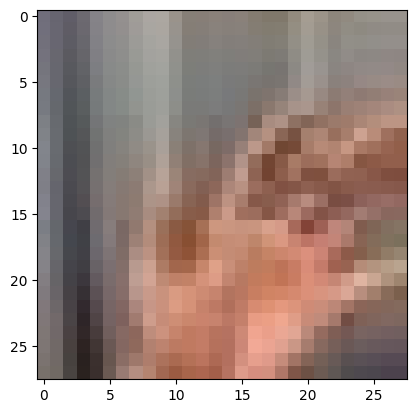

예측 확률 분포: [0.00987316 0.9843137  0.00581312]
라벨: 0,예측결과:1


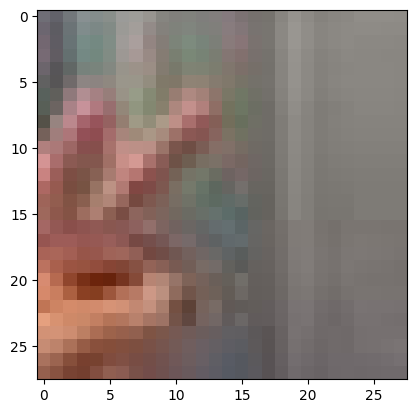

예측 확률 분포: [0.6272937  0.28336084 0.08934546]
라벨: 2,예측결과:0


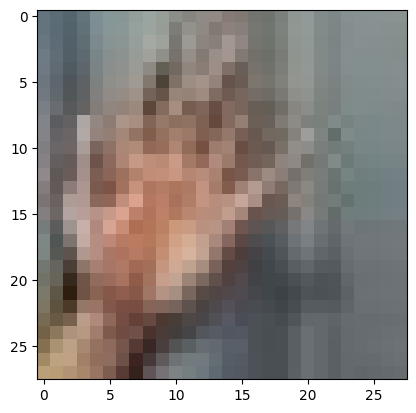

예측 확률 분포: [7.2381258e-02 3.5189974e-04 9.2726678e-01]
라벨: 0,예측결과:2


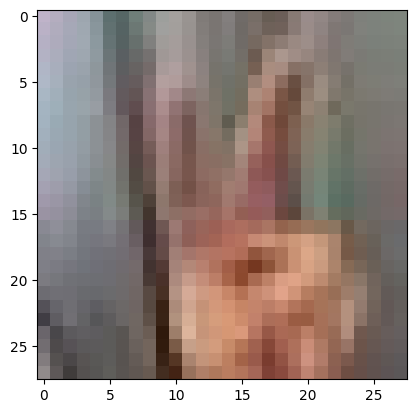

예측 확률 분포: [0.6395479  0.02758122 0.33287087]
라벨: 2,예측결과:0


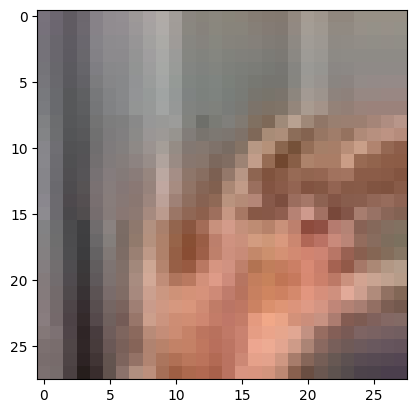

예측 확률 분포: [5.9421889e-02 2.6889832e-04 9.4030929e-01]
라벨: 0,예측결과:2


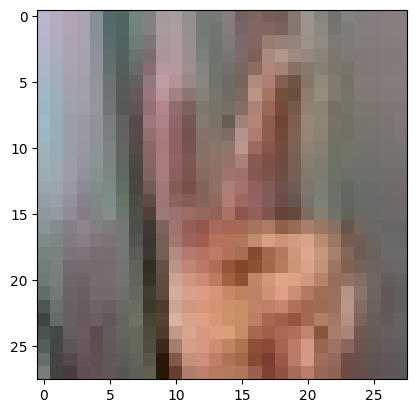

예측 확률 분포: [0.8518869  0.14724033 0.00087272]
라벨: 1,예측결과:0


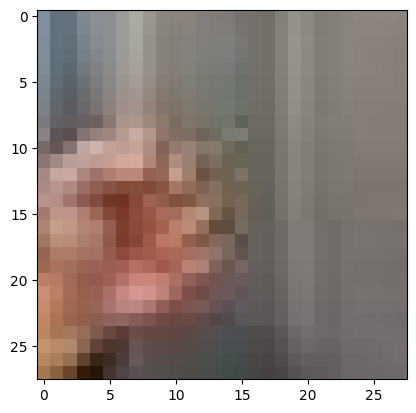

예측 확률 분포: [0.19947512 0.20580119 0.59472376]
라벨: 1,예측결과:2


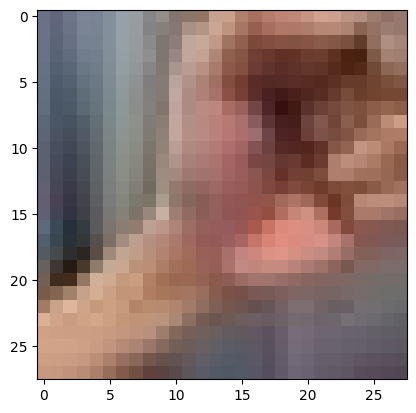

예측 확률 분포: [3.283913e-02 2.790198e-04 9.668819e-01]
라벨: 0,예측결과:2


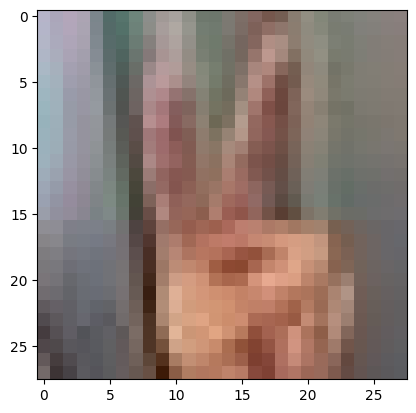

예측 확률 분포: [0.91382426 0.02140279 0.06477287]
라벨: 2,예측결과:0


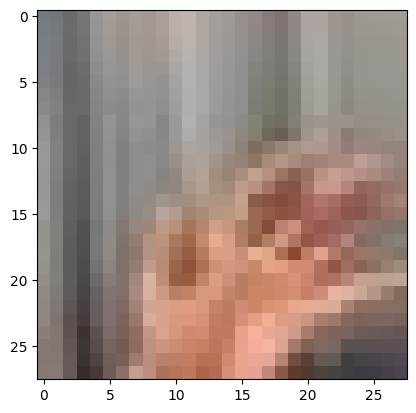

In [96]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels와 y_test가 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
# wrong_predict_list에서 랜덤하게 10개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=10)

for n in samples:
    print('예측 확률 분포: ' + str(predicted_result[n]))
    print('라벨: '+ str(y_test[n]) + ',예측결과:' + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()


* 가위:0, 바위:1, 보:2 인데 골고루 오답임
* 신경망 층을 늘려보자

__(5) 신경망 층 늘려보기__
* 신경망 층이 깊어질수록 각 층을 지날대마다 데이터 크기가 줄어들어서 padding 넣고 실험함

In [100]:
# 기존 하이퍼파라미터 고정
n_channel_1 = 16
n_channel_2 = 32
n_dense = 32
n_train_epoch = 10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), padding='same', activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(16, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Epoch 1/10
53/53 [==============================] - 1s 11ms/step - loss: 1.0907 - accuracy: 0.3756 - val_loss: 1.0718 - val_accuracy: 0.4167
Epoch 2/10
53/53 [==============================] - 0s 8ms/step - loss: 1.0239 - accuracy: 0.5196 - val_loss: 0.9266 - val_accuracy: 0.5810
Epoch 3/10
53/53 [==============================] - 0s 8ms/step - loss: 0.7393 - accuracy: 0.7274 - val_loss: 0.5973 - val_accuracy: 0.7357
Epoch 4/10
53/53 [==============================] - 0s 9ms/step - loss: 0.4750 - accuracy: 0.8321 - val_loss: 0.3642 - val_accuracy: 0.8905
Epoch 5/10
53/53 [==============================] - 0s 9ms/step - loss: 0.3096 - accuracy: 0.9030 - val_loss: 0.3054 - val_accuracy: 0.8857
Epoch 6/10
53/53 [==============================] - 0s 9ms/step - loss: 0.2426 - accuracy: 0.9155 - val_loss: 0.2068 - val_accuracy: 0.9333
Epoch 7/10
53/53 [==============================] - 0s 9ms/step - loss: 0.1665 - accuracy: 0.9512 - val_loss: 0.1720 - val_accuracy: 0.9381
Epoch 8/10
53/53 [=

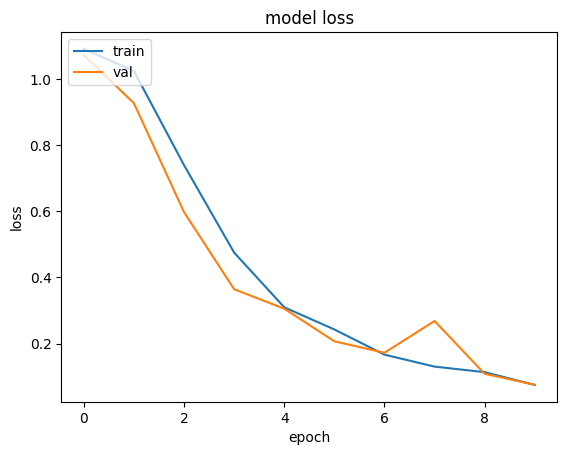

10/10 - 0s - loss: 1.0012 - accuracy: 0.6500 - 38ms/epoch - 4ms/step
test_loss: 1.0012367963790894 
test_accuracy: 0.6499999761581421


In [101]:
# 모델 훈련
history=model.fit(x_train, y_train, epochs=n_train_epoch, validation_data=(x_val, y_val))

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

신경망 깊이를 늘리니 loss가 확연히 줄고, accuracy가 65%로 향상됨.

# 회고

* 가위, 바위, 보 이미지를 분류하는 classifier를 만들어 봄.
* 정제되지 않은 웹캠 사진을 이용해 데이터를 만들고 컬러사진을 학습하는 classifier를 만들어 봄.
* Cov2D layer는 3x3 kernel size를 갖는 16개(32개) filter로 이미지 데이터를 screening하여 feature를 추출함.
* Maxpooling2D layer는 2x2 size를 갖고 있으며, 2x2 size 내에서 가장 큰 수(the most important feature)만을 추출해 output layer의 차원을 축소시킴.<br>
<br>
* 모델의 성능을 향상시키기 위해(loss 값 줄이고 accuracy 향상) 다양한 하이퍼파라미터를 조절해봄.
* 데이터를 다양화시키고 갯수를 늘리기 위해 다른 그루분들의 데이터를 받아 학습을 진행함.
* 마지막 layer에서 분류 이미지 class 종류를 10에서 3으로 수정한 이후 train과 validation dataset 간의 overfitting은 해결함.
* 그러나, 다양한 하이퍼파라미터를 조절해도 test data의 accuracy가 증가하지 않음.<br>
<br>
* 이를 해결하기 위해 초기 하이퍼파라미터 값은 고정하고 신경망 층을 더 깊게 쌓아봄.
* 층을 거칠수록 output data의 크기가 작아지므로 이미지의 모든 면에 padding을 넣어 학습을 진행함(padding='same')
* conv2D, Maxpooling2D layer를 2쌍 추가한 이후 test data의 accuracy가 65 %로 향상됨.
* 그러나, 같은 조건으로 다시 학습과 테스트를 진행해도 할 때마다 accuracy 값이 변함. 데이터 수가 부족했거나, 이미지를 보면 손과 배경의 구분이 뚜렷하지 않은데 배경에 다른 사물(침대, 창문, 벽지)가 걸려있는 경우 feature 추출이 잘못이루어져서 그런게 아닌가 싶음.
